In [1]:
# -*- coding: cp1252 -*-
import pandas
import numpy as np
import re
import statsmodels.api as sm

#################################################################################
#       READING DATA
#################################################################################
print ("READIND DATA...")
df = pandas.read_csv("https://raw.githubusercontent.com/manoelgadi/ESMA/refs/heads/main/Day3_ESGRating/02_ie_esma_traditional_rating.csv", sep=';')



READIND DATA...


In [2]:
#################################################################################
#       CALCULATING RATIOS
#################################################################################
print ("CALCULATING RATIOS...")

#################################################################################
# Activity Ratios:
#################################################################################
# (1) Inventory turnover =  Sales / Turnover
# (1) Rotación de inventario  =  Importe neto de la cifra de Negocio / Existencias (ejemplo: 5x)
df['r1_act_InvTurn'] = df['40100']/df['12200']
print ('r1_act_InvTurn:')
print (df['r1_act_InvTurn'])

#(2) Inventory turnover in days = 365 * Turnover / Sales  [in days]
#(2) Rotación de inventario en días =  365 * Existencias / Importe neto de la cifra de Negocio [en días]
df['r2_act_InvTurnDays'] = 365*df['12200']/df['40100']
print ('r2_act_InvTurnDays:')
print (df['r2_act_InvTurnDays'])


CALCULATING RATIOS...
r1_act_InvTurn:
0       5.737033e+00
1       4.232438e+00
2       1.926461e+00
3       2.785040e+00
4       8.312493e+01
            ...     
3960    4.611683e+08
3961    2.121669e+09
3962    2.566968e+09
3963    5.566894e+06
3964    8.150356e+06
Name: r1_act_InvTurn, Length: 3965, dtype: float64
r2_act_InvTurnDays:
0       6.362173e+01
1       8.623871e+01
2       1.894666e+02
3       1.310573e+02
4       4.390981e+00
            ...     
3960    7.914681e-07
3961    1.720343e-07
3962    1.421911e-07
3963    6.556619e-05
3964    4.478332e-05
Name: r2_act_InvTurnDays, Length: 3965, dtype: float64


In [3]:
#################################################################################
# Liquidity Ratios:
#################################################################################
#(3) Quick ratio =  (Current assets - Inventories) / Current liabilities
#(3) Quick ratio =  (Activos Corrientes - Existencia) / Pasivos Corrientes
df['r3_liq_QuickRatio'] = (df['12000']-df['12200'])/df['32000']
print ('r3_liq_QuickRatio:')
print (df['r3_liq_QuickRatio'])



r3_liq_QuickRatio:
0       2.529852
1       4.079161
2       1.016065
3       1.452503
4       4.123801
          ...   
3960    1.209129
3961    0.966856
3962    1.090675
3963    0.065249
3964    0.922170
Name: r3_liq_QuickRatio, Length: 3965, dtype: float64


In [4]:
#################################################################################
# Leverage Ratios:
#################################################################################
#(4) Equity ratio =  equity / assets
#(4) Equity ratio =  Patrimonio Neto / Activos
df['r4_lev_EquityRatio'] = df['20000']/df['10000']
print ('r4_lev_EquityRatio:')
print (df['r4_lev_EquityRatio'])



r4_lev_EquityRatio:
0       7.606255e-01
1       8.964793e-01
2       5.765936e-01
3       5.525385e-01
4       9.349091e-01
            ...     
3960    1.962956e-01
3961   -3.428070e-02
3962    8.313695e-02
3963    7.791938e+05
3964    4.864857e+06
Name: r4_lev_EquityRatio, Length: 3965, dtype: float64


In [5]:
#################################################################################
# Profitability Ratios:
#################################################################################
#(5) Gross profit margin =  Gross Profit* / Turnover
#(5) Gross profit margin =  (Importe neto de la cifra de Negocio - Aprovisionamientos) / Importe neto de la cifra de Negocio
df['r5_prof_GrossProfitMargin'] = (df['40100']-df['40400'])/df['40100']
print ('r5_prof_GrossProfitMargin:')
print (df['r5_prof_GrossProfitMargin'])


r5_prof_GrossProfitMargin:
0       1.756836
1       1.768608
2       1.568710
3       1.488517
4       1.258319
          ...   
3960    1.984650
3961    1.794683
3962    1.805598
3963    0.976107
3964    0.987208
Name: r5_prof_GrossProfitMargin, Length: 3965, dtype: float64


In [6]:
#################################################################################
# Capital Structure Ratios:
#################################################################################
#(6) (EBITDA / Interest Expense) = EBITDA / Interest Expense
#(6) (EBITDA / Interest Expense) = (Resultado de explotación - Amortización Del Inmovilizado) / Gastos Financieros (Gastos de Intereses)
df['r6_cap_EbitdaXInterestExpense'] = (df['49100']-df['40800'])/df['41500']
print ('r6_cap_EbitdaXInterestExpense:')
print (df['r6_cap_EbitdaXInterestExpense'])


r6_cap_EbitdaXInterestExpense:
0      -4.038900e+01
1      -3.021023e+01
2       9.405926e+00
3      -1.152911e+01
4      -2.773046e+02
            ...     
3960    1.223975e+01
3961   -1.635398e+07
3962    4.453867e+07
3963   -2.609202e+06
3964    8.944889e+04
Name: r6_cap_EbitdaXInterestExpense, Length: 3965, dtype: float64


In [7]:
#################################################################################
# Size (and Size Appropriateness) Ratios:
#################################################################################
#(7) Size2 = Treasury (Cash+Cash and equivalents)/Assets = Tesoreria (Caja+Bancos) / Activos
df['r7_siz_TreasuryXAssets'] = df['12710']/df['10000']
print ('r7_siz_TreasuryXAssets:')
print (df['r7_siz_TreasuryXAssets'])


r7_siz_TreasuryXAssets:
0       3.270911e-09
1       3.618211e-09
2       1.380715e-02
3       4.667852e-02
4       4.195191e-03
            ...     
3960    1.644578e-08
3961    2.096168e-09
3962    1.866624e-09
3963    1.000000e+00
3964    1.000000e+00
Name: r7_siz_TreasuryXAssets, Length: 3965, dtype: float64


In [8]:
#################################################################################
# Grow Ratios:
#################################################################################
# codition: same company and current 'year' is one year after previous row (example 2014 and 2013)
df['codition'] = (df['company'] == df['company'].shift(1)) & (df['year']-1 == df['year'].shift(1))
#(4) Net Income =  Net Income[YEAR]/Net Income[YEAR-1]
#(4) Net Income =  Resultado del ejercicio[AÑO ACTUAL]/Resultado del ejercicio[AÑO ANTERIOR]
df.loc[df['codition'], 'r8_grow_NetIncome'] = df['49500'] / df['49500'].shift(1)
print ('r8_grow_NetIncome:')
print (df['r8_grow_NetIncome'])



r8_grow_NetIncome:
0            NaN
1       0.766098
2            NaN
3      -0.410036
4            NaN
          ...   
3960   -0.486287
3961         NaN
3962   -2.723414
3963         NaN
3964   -0.087689
Name: r8_grow_NetIncome, Length: 3965, dtype: float64


In [9]:
#IDENTIFYING ALL RATIOS...
RATIOS = []
for var_name in df.columns:
    if re.search('^r',var_name):
        RATIOS.append(var_name)


In [10]:
##################################################################################
# CALCULATING RANKINGS FOR ALL RATIOS...
##################################################################################
print ("CALCULATING RANKINGS FOR ALL RATIOS...")
for ratio in RATIOS:
    df[ratio+'_rank'] = df[ratio].rank() / len(df)

RANKS = []
for var_name in df.columns:
    if re.search('_rank',var_name):
        RANKS.append(var_name)


CALCULATING RANKINGS FOR ALL RATIOS...


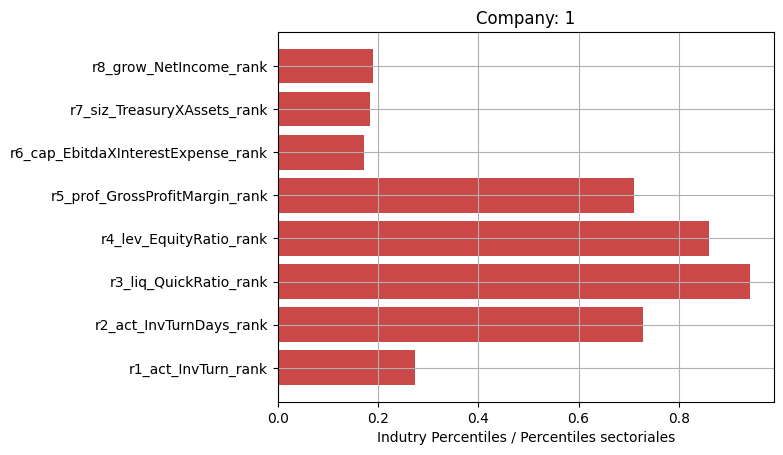

In [11]:
"""
Horizontal bar chart.
"""
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt


# Example data
company = 1 #Empresa 1
dfind = df[(df["company"] == company) & (df["year"] == 2013)]
dfind = dfind[RANKS]

y_pos = np.arange(len(RANKS))
performance = list(np.hstack(dfind.values.tolist()))

error = np.random.rand(len(RANKS))

plt.barh(y_pos, performance, align='center',  ecolor='r', alpha=0.8, color=(0.75,0.1,0.1), linewidth=0)
plt.yticks(y_pos, RANKS)
plt.xlabel('Indutry Percentiles / Percentiles sectoriales')
plt.title('Company: ' + str(company) )
plt.grid(True)
plt.show()


In [12]:
##################################################################################
# NORMALISING ALL RATIOS...
##################################################################################
print ("NORMALISING ALL RATIOS...")
for ratio in RATIOS:
    df = df[np.abs(df[ratio]-df[ratio].mean())<=(10*df[ratio].std())] #keep only the ones that are within +10 to -10 standard deviations in the column 'Data'.
    df[ratio+'_normalised'] = (df[ratio] - df[ratio].mean()) / df[ratio].std()


NORMALISING ALL RATIOS...


<ipython-input-12-1c8815691958>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ratio+'_normalised'] = (df[ratio] - df[ratio].mean()) / df[ratio].std()


In [13]:
##################################################################################
# DEVELOPING A MODEL...
##################################################################################
#IDENTIFYING NORMALISED RATIOS...
IN_MODEL= []
for var_name in df.columns:
    if re.search('_normalised',var_name):
        IN_MODEL.append(var_name)

output_var = 'target'

X = df[list(IN_MODEL)]
y = df[output_var]


#model = sm.Logit(y,X)
try:
    model = sm.GLM(y,X, family = sm.families.Binomial())
    result = model.fit()
    print (result.summary())
    y_pred = result.predict(X)
except np.linalg.linalg.LinAlgError as err:
    print ("MODEL-INVALID (Singular Matrix)")


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                 1869
Model:                            GLM   Df Residuals:                     1861
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -391.24
Date:                Mon, 10 Feb 2025   Deviance:                       782.48
Time:                        13:36:57   Pearson chi2:                 1.86e+03
No. Iterations:                    12   Pseudo R-squ. (CS):            0.01090
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [ ]:
df['pred'] = y_pred

from sklearn.metrics import roc_auc_score
gini_score = 2*roc_auc_score(df[output_var], y_pred)-1
print ("GINI DEVELOPMENT=", gini_score)


GINI DEVELOPMENT= 0.24657332752233607


In [ ]:
##################################################################################
# WRITTING DOWN RESULTS
##################################################################################
#print ("WRITTING TO CSV...")
#df.to_csv("ie_mbd_s05n6_companies_calc_ratios_v3.csv", sep=';')


WRITTING TO CSV...
